<img src="http://www.digitalvidya.com/wp-content/uploads/2013/05/logoa5-300x95.png">

## Data Analysis using Python Assignment Week 7
### Digital Vidya Copyright

We get stocks data using package pandas_datareader. You will have to first install pandas_datareader using either of the commands given below (pip or pip3 or conda). We have selected Infy, HDFC Bank, Tata Motors and Wipro which are listed on NYSE. Once we get the data, we will do some aggregations using pandas functions and datetime funcionalities.

In [1]:
#conda install -c https://conda.anaconda.org/anaconda pandas-datareader
#pip3 install pandas_datareader
#pip install pandas_datareader

import pandas as pd
import numpy as np
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

start = dt.datetime(2015, 1, 1)

end = dt.datetime.today()

stocks = ['INFY', 'HDB', 'TTM', 'WIT']

df = web.get_data_yahoo(stocks, start, end)
df.items

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

The above df is of the type panel, which is a 3-D array. You can create a dataframe from that by calling df[index_name] and assiging it to the desired dataframe name.

#### 1. Create a dataframe called open_prices using open prices of the listed stocks. Create a line graph showing each of the four stock price as one line. Set the figure size to 12,6 for better visualization and add grids. The plot will have four lines depicting each stock and a legend.

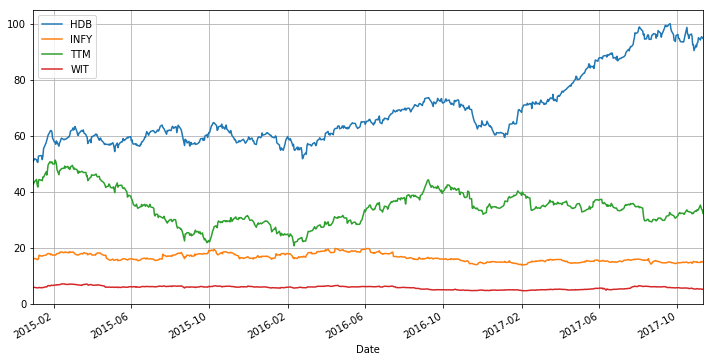

In [2]:
open_prices = df['Open']
open_prices.plot(kind = 'line', figsize = [12,6], grid = True)

#### 2. Use the dataframe open_prices created in qn 1 to create open_yearly with mean open prices every year. Create a bar chart with stock name on X-axis and price on Y-axis. The resulting plot will have multiple bar plot comparing price of each stock for 2015, 2016 and 2017. The legend should specify which colored bar represents which year for each stock.

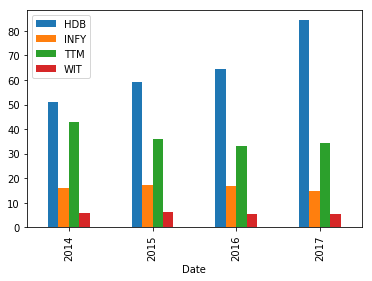

In [3]:
open_prices.groupby(open_prices.index.year).mean().plot(kind = 'bar')

#### 3. Plot 4 different line plots for the 4 companies in dataframe open_prices. Year would be on X-axis, stock price on Y axis, you will need (2,2) plot. Set figure size to 10, 8 and share X-axis for better visibility.

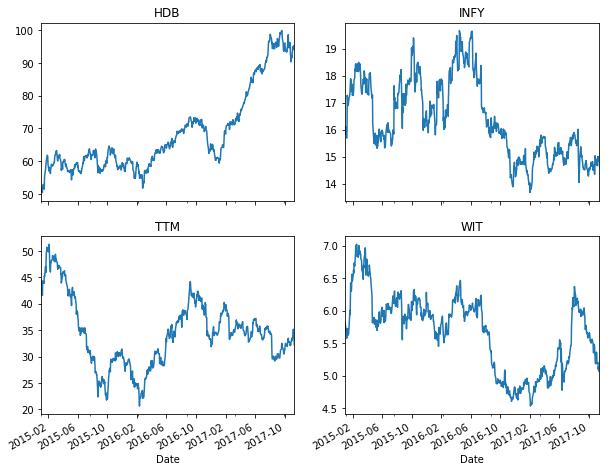

In [4]:
f, ax = plt.subplots(2, 2, figsize = [10,8], sharex = True)
open_prices['HDB'].plot(kind = 'line',ax = ax[0,0])
ax[0,0].set_title('HDB')
open_prices['INFY'].plot(kind = 'line', ax = ax[0,1])
ax[0,1].set_title('INFY')
open_prices['TTM'].plot(kind = 'line', ax = ax[1,0])
ax[1,0].set_title('TTM')
open_prices['WIT'].plot(kind = 'line', ax = ax[1,1])
ax[1,1].set_title('WIT')

#### 4. Extract the data for Amazon stock and plot a line graph with two lines representing daily high and low prices respectively.

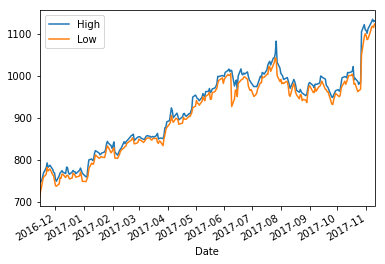

In [5]:
Amazon = web.DataReader('AMZN', 'google', start, end)
Amazon['High'].plot(kind = 'line',legend = True)
Amazon['Low'].plot(kind = 'line', legend = True)

#### 5. Create 3 pie charts from the open_prices dataframe, each representing % mean prices of stocks per year. You should get three charts for year 2015, 2016 and 2017 respectively.

(-1.1147862808559768,
 1.1353855370478421,
 -1.1125457693050209,
 1.1005974185627638)

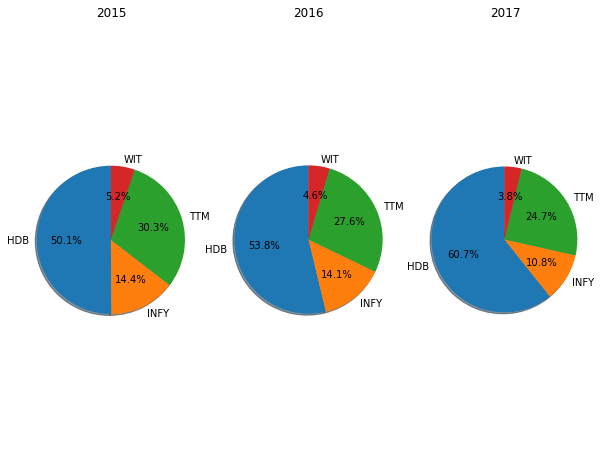

In [6]:
open_prices = open_prices.groupby(open_prices.index.year).mean()
f, ax = plt.subplots(1,3,figsize = [10,8])
ax[0].pie(x = open_prices.iloc[1,:], startangle = 90, shadow = True, autopct = '%1.1f%%',labels = ['HDB','INFY','TTM','WIT'])
ax[0].set_title('2015')
ax[0].axis('equal')

ax[1].pie(x = open_prices.iloc[2,:],startangle = 90, shadow = True, autopct = '%1.1f%%',labels = ['HDB','INFY','TTM','WIT'])
ax[1].axis('equal')
ax[1].set_title('2016')

ax[2].pie(x = open_prices.iloc[3,:],startangle = 90, shadow = True, autopct = '%1.1f%%',labels = ['HDB','INFY','TTM','WIT'])
ax[2].set_title('2017')
ax[2].axis('equal')